# Assignment no 7 Computer data porblem r code 

We are here to predict the sales of the computer from the computer data provide, first understand the meaning of the data 
what it says, we have numerical data along with catagorical data , our intrest point here in this synario that 
we are more intrested in Price and its relation ship with othervaiabl and we cannot igonore catarogical variable and will make prediceiton

In [2]:
df  <- read.csv('Computer_Data.csv') # reading our data 

In [4]:
print(head(df)) # we see the variable and features 

  X price speed  hd ram screen cd multi premium ads trend
1 1  1499    25  80   4     14 no    no     yes  94     1
2 2  1795    33  85   2     14 no    no     yes  94     1
3 3  1595    25 170   4     15 no    no     yes  94     1
4 4  1849    25 170   8     14 no    no      no  94     1
5 5  3295    33 340  16     14 no    no     yes  94     1
6 6  3695    66 340  16     14 no    no     yes  94     1


In [5]:
print(summary(df))

       X            price          speed              hd        
 Min.   :   1   Min.   : 949   Min.   : 25.00   Min.   :  80.0  
 1st Qu.:1566   1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214.0  
 Median :3130   Median :2144   Median : 50.00   Median : 340.0  
 Mean   :3130   Mean   :2220   Mean   : 52.01   Mean   : 416.6  
 3rd Qu.:4694   3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528.0  
 Max.   :6259   Max.   :5399   Max.   :100.00   Max.   :2100.0  
      ram             screen        cd       multi      premium   
 Min.   : 2.000   Min.   :14.00   no :3351   no :5386   no : 612  
 1st Qu.: 4.000   1st Qu.:14.00   yes:2908   yes: 873   yes:5647  
 Median : 8.000   Median :14.00                                   
 Mean   : 8.287   Mean   :14.61                                   
 3rd Qu.: 8.000   3rd Qu.:15.00                                   
 Max.   :32.000   Max.   :17.00                                   
      ads            trend      
 Min.   : 39.0   Min.   : 1.00  
 1st Qu.:1

## Playing with attribute of the data 

In [6]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
glimpse(df)# it looks we have 3 factor dat and all integer type 

Rows: 6,259
Columns: 11
$ X       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
$ price   <int> 1499, 1795, 1595, 1849, 3295, 3695, 1720, 1995, 2225, 2575,...
$ speed   <int> 25, 33, 25, 25, 33, 66, 25, 50, 50, 50, 33, 66, 50, 25, 50,...
$ hd      <int> 80, 85, 170, 170, 340, 340, 170, 85, 210, 210, 170, 210, 13...
$ ram     <int> 4, 2, 4, 8, 16, 16, 4, 2, 8, 4, 8, 8, 4, 8, 8, 4, 2, 4, 4, ...
$ screen  <int> 14, 14, 15, 14, 14, 14, 14, 14, 14, 15, 15, 14, 14, 14, 14,...
$ cd      <fct> no, no, no, no, no, no, yes, no, no, no, no, no, no, no, no...
$ multi   <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, no,...
$ premium <fct> yes, yes, yes, no, yes, yes, yes, yes, yes, yes, yes, yes, ...
$ ads     <int> 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,...
$ trend   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...


## Data pre processing and cleaning 

In [12]:
anyNA(df) # there is no na value present 

[1] FALSE

In [16]:
sum(is.na(df)==T)# it is showing that there is no na value present in our data it means no missing value

[1] 0

In [17]:
numeric_col = sapply(df,is.numeric)

In [20]:
numeric_col

X   price   speed      hd     ram  screen      cd   multi premium     ads 
   TRUE    TRUE    TRUE    TRUE    TRUE    TRUE   FALSE   FALSE   FALSE    TRUE 
  trend 
   TRUE

In [21]:
x = cor(df[,numeric_col]) # putting correaltion data into x as it is numeric

In [23]:
print(head(x)) # printed correlated data 

                X      price     speed        hd       ram    screen
X       1.0000000 -0.1999235 0.3885662 0.5554922 0.2653759 0.1846995
price  -0.1999235  1.0000000 0.3009765 0.4302578 0.6227482 0.2960415
speed   0.3885662  0.3009765 1.0000000 0.3723041 0.2347605 0.1890741
hd      0.5554922  0.4302578 0.3723041 1.0000000 0.7777263 0.2328015
ram     0.2653759  0.6227482 0.2347605 0.7777263 1.0000000 0.2089537
screen  0.1846995  0.2960415 0.1890741 0.2328015 0.2089537 1.0000000
               ads      trend
X      -0.27271422  0.9898184
price   0.05454047 -0.1999869
speed  -0.21523206  0.4054383
hd     -0.32322200  0.5777901
ram    -0.18166971  0.2768438
screen -0.09391943  0.1886144


## Lets do our feature visualisation from our data 

In [25]:
library(corrgram)
library(corrplot)

Warning message:
"package 'corrgram' was built under R version 3.6.3"
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



                X       price      speed         hd        ram      screen
X       1.0000000 -0.19992353  0.3885662  0.5554922  0.2653759  0.18469950
price  -0.1999235  1.00000000  0.3009765  0.4302578  0.6227482  0.29604147
speed   0.3885662  0.30097646  1.0000000  0.3723041  0.2347605  0.18907412
hd      0.5554922  0.43025779  0.3723041  1.0000000  0.7777263  0.23280153
ram     0.2653759  0.62274824  0.2347605  0.7777263  1.0000000  0.20895374
screen  0.1846995  0.29604147  0.1890741  0.2328015  0.2089537  1.00000000
ads    -0.2727142  0.05454047 -0.2152321 -0.3232220 -0.1816697 -0.09391943
trend   0.9898184 -0.19998694  0.4054383  0.5777901  0.2768438  0.18861444
               ads      trend
X      -0.27271422  0.9898184
price   0.05454047 -0.1999869
speed  -0.21523206  0.4054383
hd     -0.32322200  0.5777901
ram    -0.18166971  0.2768438
screen -0.09391943  0.1886144
ads     1.00000000 -0.3185525
trend  -0.31855251  1.0000000


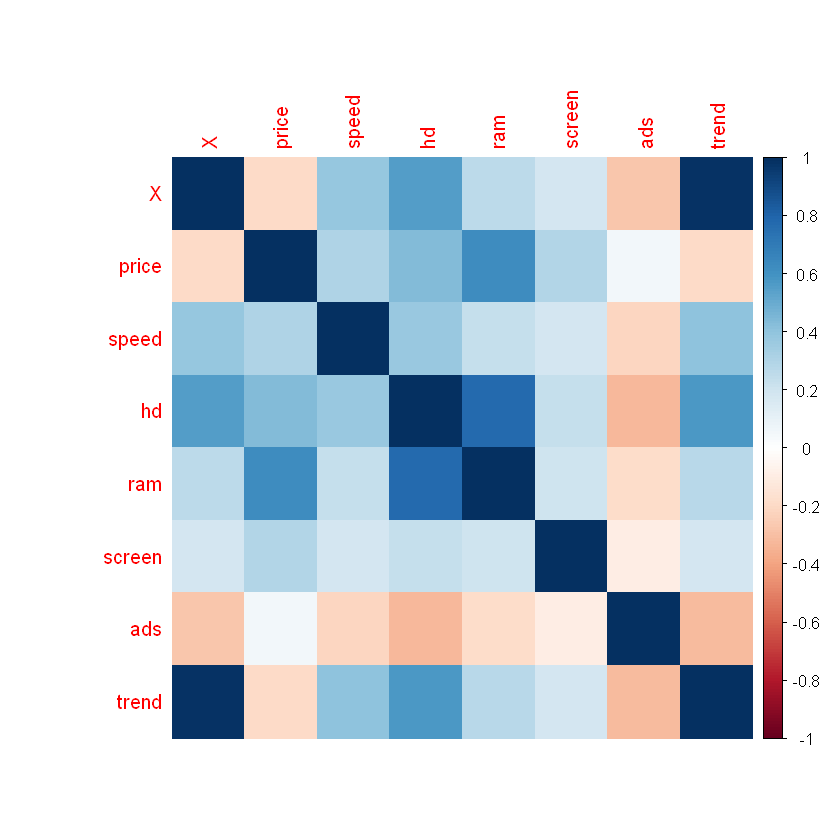

In [26]:
print(corrplot(x,method = 'color'))

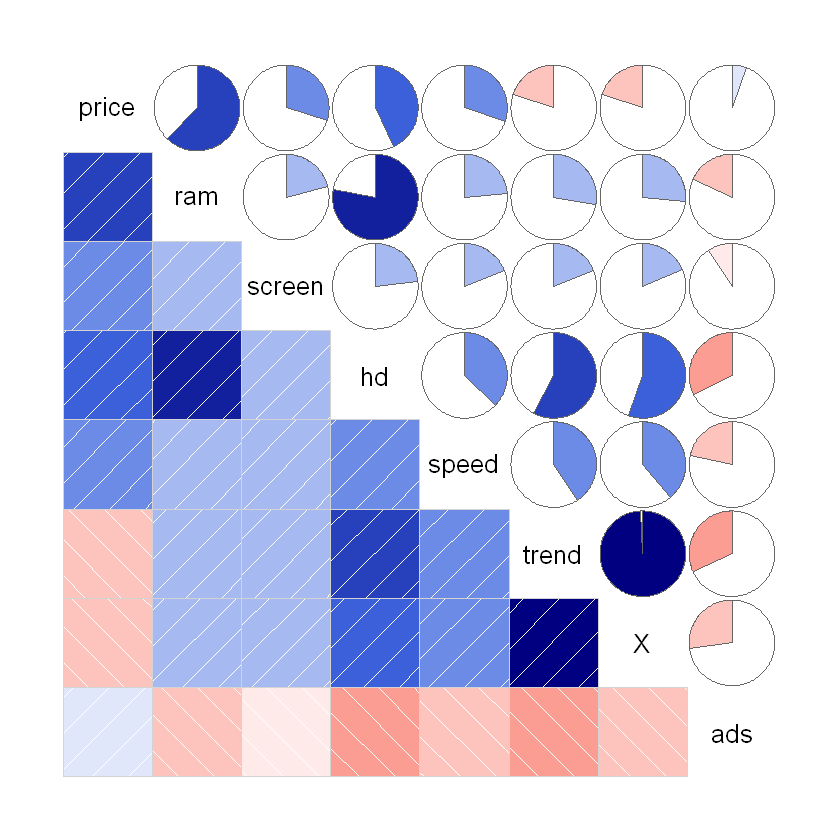

In [32]:
corrgram(df,order=TRUE,lower.panel = panel.shade,upper.panel = panel.pie,text.panel = panel.txt)

 red indicated the negative and blue indicate the positive correalton and percentage of correaltion

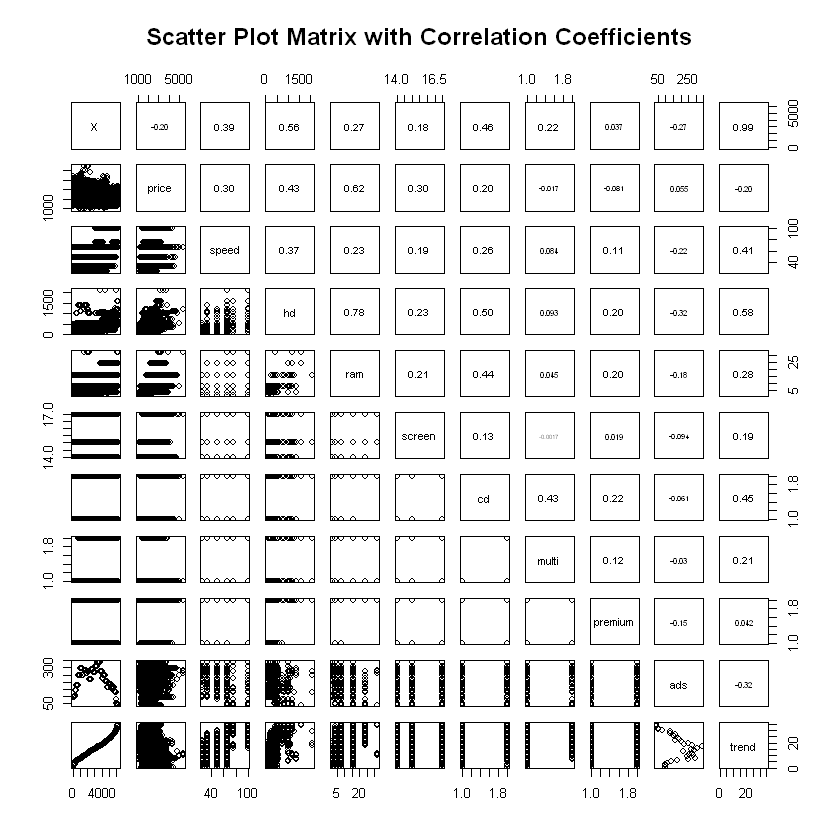

In [29]:
panel.cor <- function(x, y, digits=2, prefix="", cex.cor)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r = (cor(x, y))
  txt <- format(c(r, 0.123456789), digits=digits)[1]
  txt <- paste(prefix, txt, sep="")
  if(missing(cex.cor)) cex <- 0.4/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex)
}
pairs(df, upper.panel=panel.cor,main="Scatter Plot Matrix with Correlation Coefficients")

Asuming and taking all the data into our model for making only predictive model , as question says pridict the price means sales of the computer. 

first create a linear model

In [42]:
colnames(df)

[1] "X"       "price"   "speed"   "hd"      "ram"     "screen"  "cd"     
 [8] "multi"   "premium" "ads"     "trend"

In [33]:
attach(df)

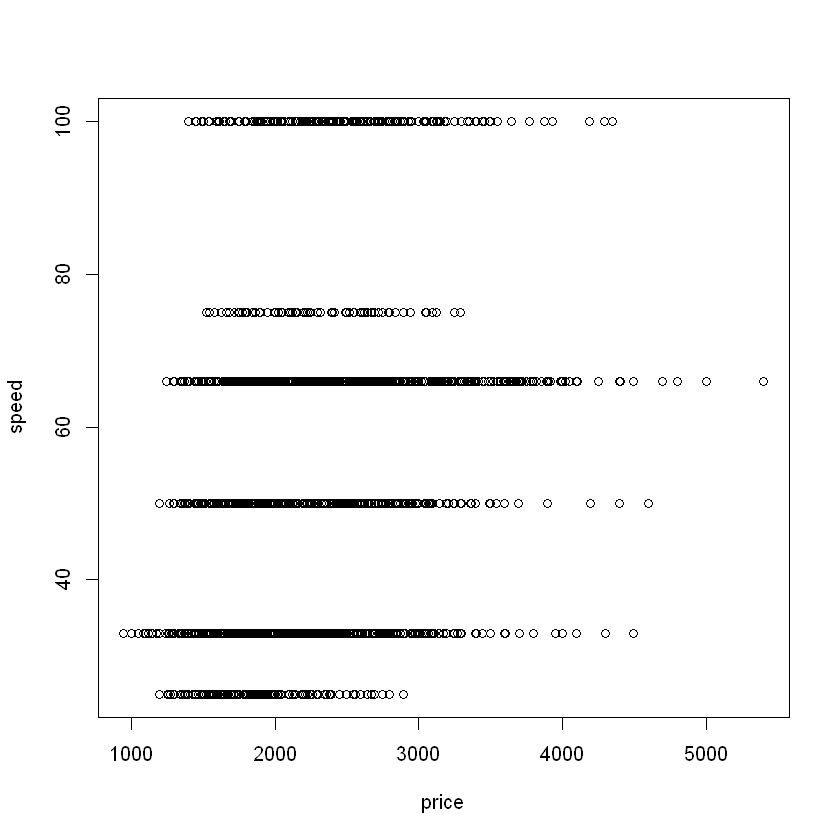

In [35]:
plot(price,speed)

What this data relationship with price and speed indicates that people are ready to pay premimu for speed but some data point indicated average speed is also demand in market, dont know about specific unit of data measurement what it is taken im assuming it is the type of labtop variant with different speed 

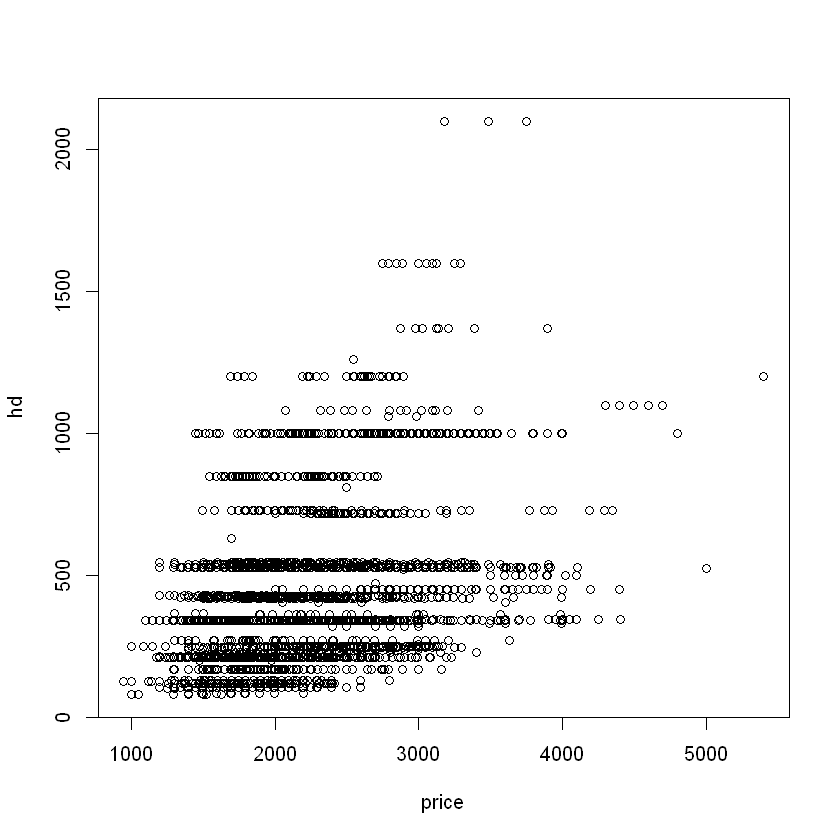

In [37]:
plot(price,hd)

people generally prefer hd with least cost as the graph shown this we can see visual indication

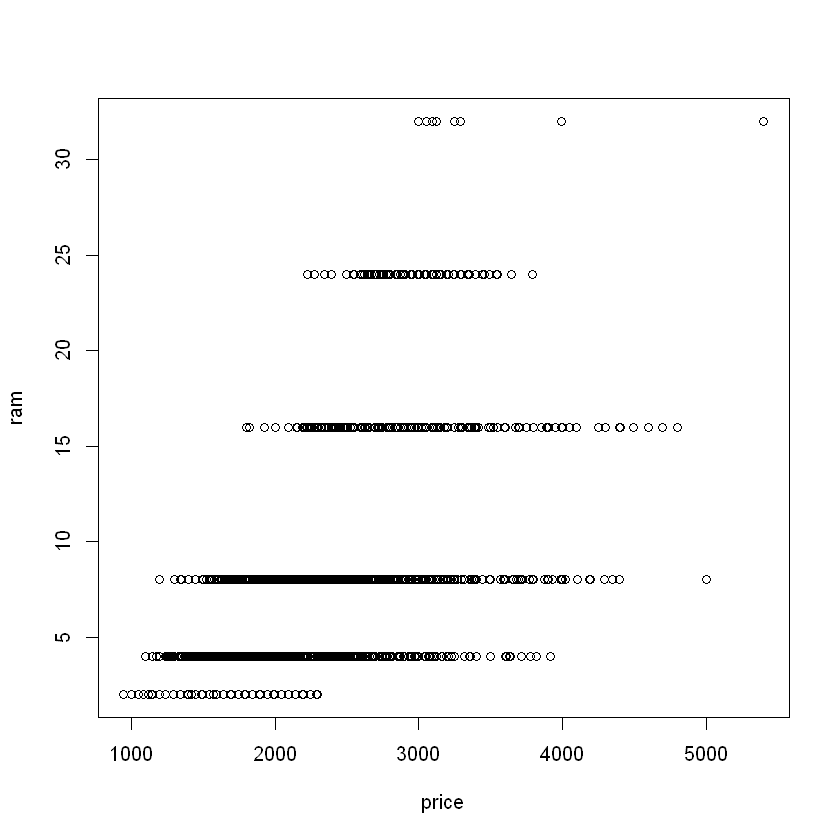

In [38]:
plot(price,ram)

avarage price indicate that people are willing to pay average price between 3000 to 4000 for computer

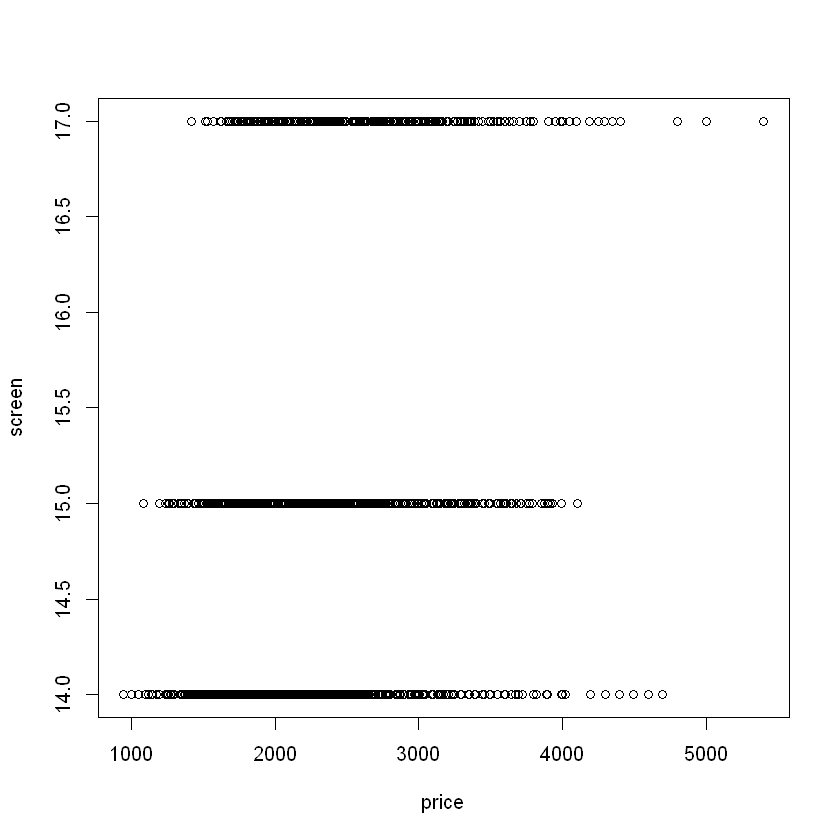

In [44]:
plot(price,screen)

14 inch screen highly preferred as compared to other two type of screen , 

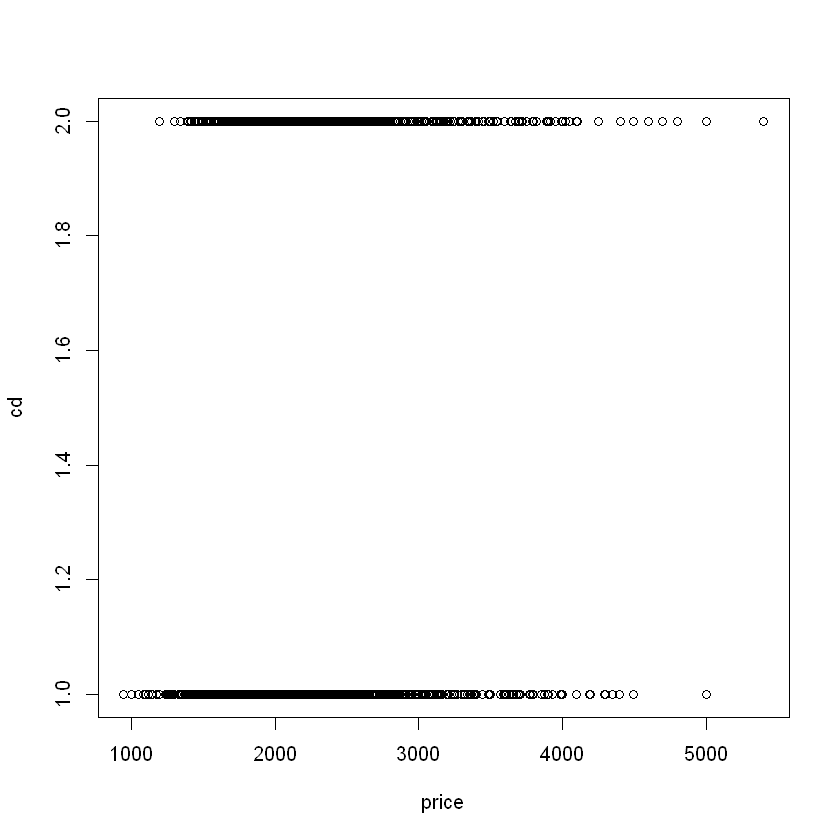

In [45]:
plot(price,cd)

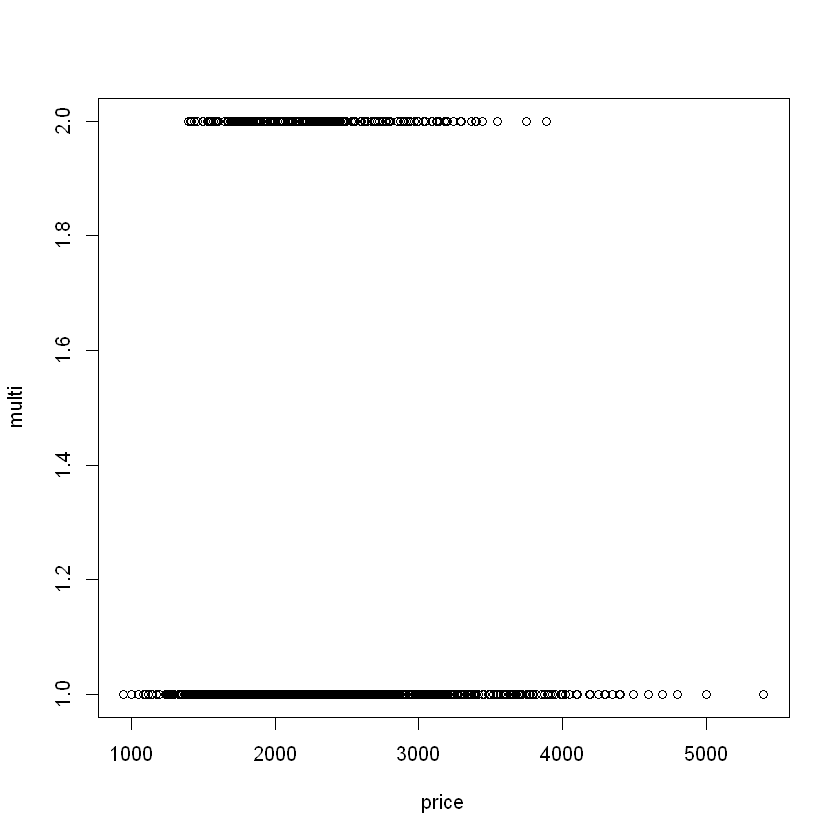

In [46]:
plot(price,multi)

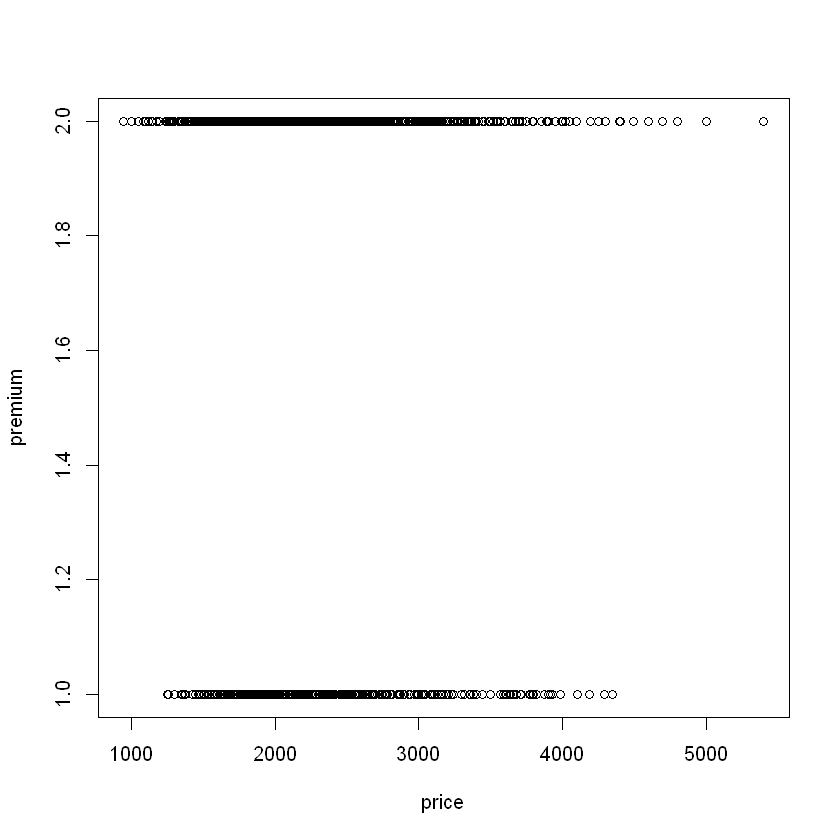

In [48]:
plot(price,premium)

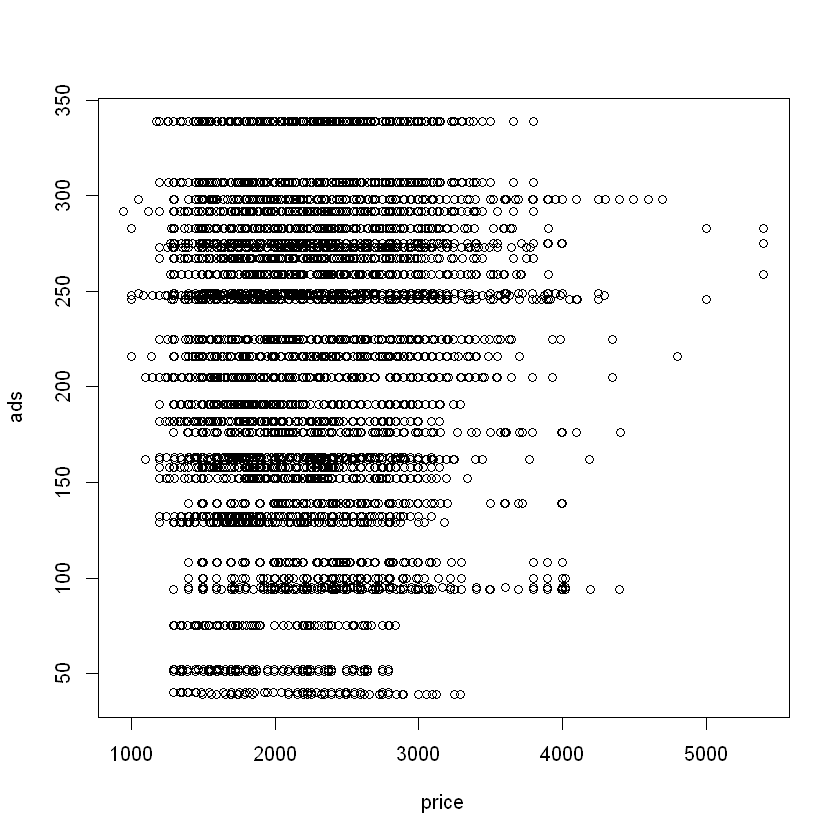

In [39]:
plot(price,ads)

time to time different add spending by the agency makes 

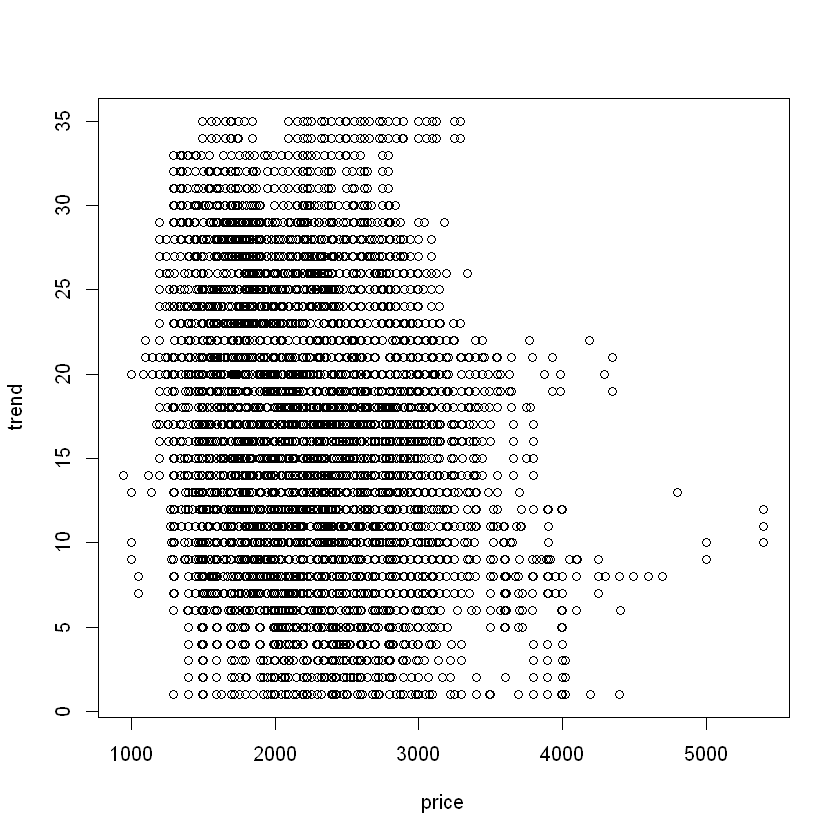

In [49]:
plot(price,trend)

Trend indicated the specific laptop during specific time perid 

# Lets make our model

In [67]:
model = lm(price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend,data = df) # created a linear model car 

In [52]:
colnames(df)

[1] "X"       "price"   "speed"   "hd"      "ram"     "screen"  "cd"     
 [8] "multi"   "premium" "ads"     "trend"

In [55]:
print(summary(model)) # we can see the model with all variable 


Call:
lm(formula = price ~ speed + hd + ram + screen + cd + multi + 
    premium + ads + trend, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1093.77  -174.24   -11.49   146.49  2001.05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  307.98798   60.35341   5.103 3.44e-07 ***
speed          9.32028    0.18506  50.364  < 2e-16 ***
hd             0.78178    0.02761  28.311  < 2e-16 ***
ram           48.25596    1.06608  45.265  < 2e-16 ***
screen       123.08904    3.99950  30.776  < 2e-16 ***
cdyes         60.91671    9.51559   6.402 1.65e-10 ***
multiyes     104.32382   11.41268   9.141  < 2e-16 ***
premiumyes  -509.22473   12.34225 -41.259  < 2e-16 ***
ads            0.65729    0.05132  12.809  < 2e-16 ***
trend        -51.84958    0.62871 -82.470  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 275.3 on 6249 degrees of freedom
Multiple R-squared:  0.7756,	Adjusted R-sq

In [56]:
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




[1] 1441 1701

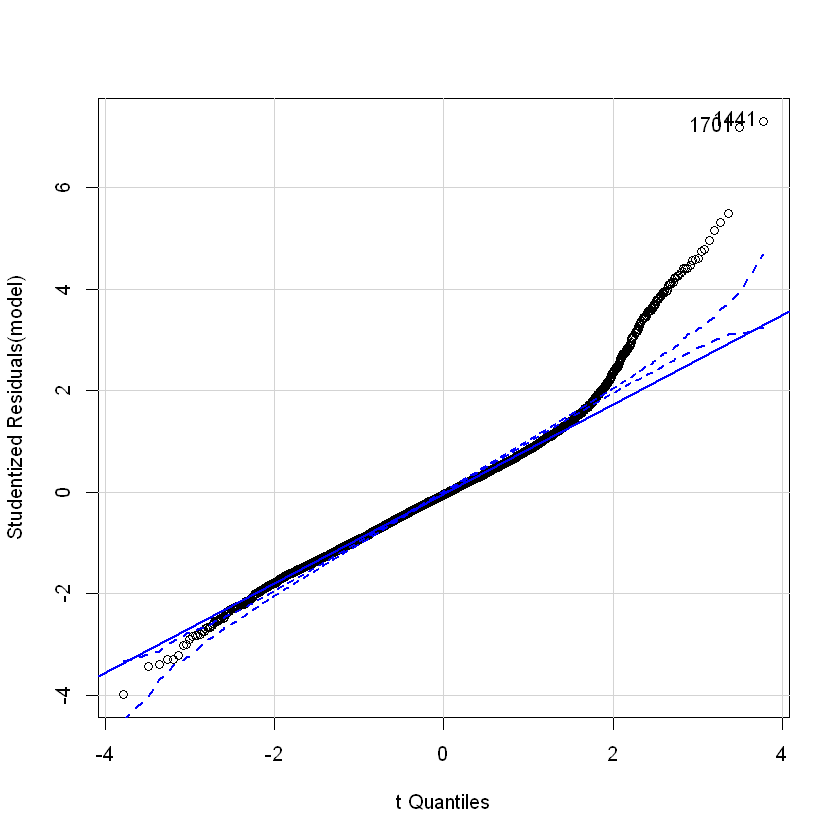

In [68]:
qqPlot(model,identify.n=4) # in this model we try to identify the outliers 

Warning message in plot.window(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in box(...):
""identify" is not a graphical parameter"
Warning message in title(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""identify" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1441,7.3058529,0.002228075,0.011819949
1701,7.1838002,0.002464463,0.012647347
3784,-0.8667018,0.020972880,0.001609237
4478,-1.3795547,0.020060286,0.003895407


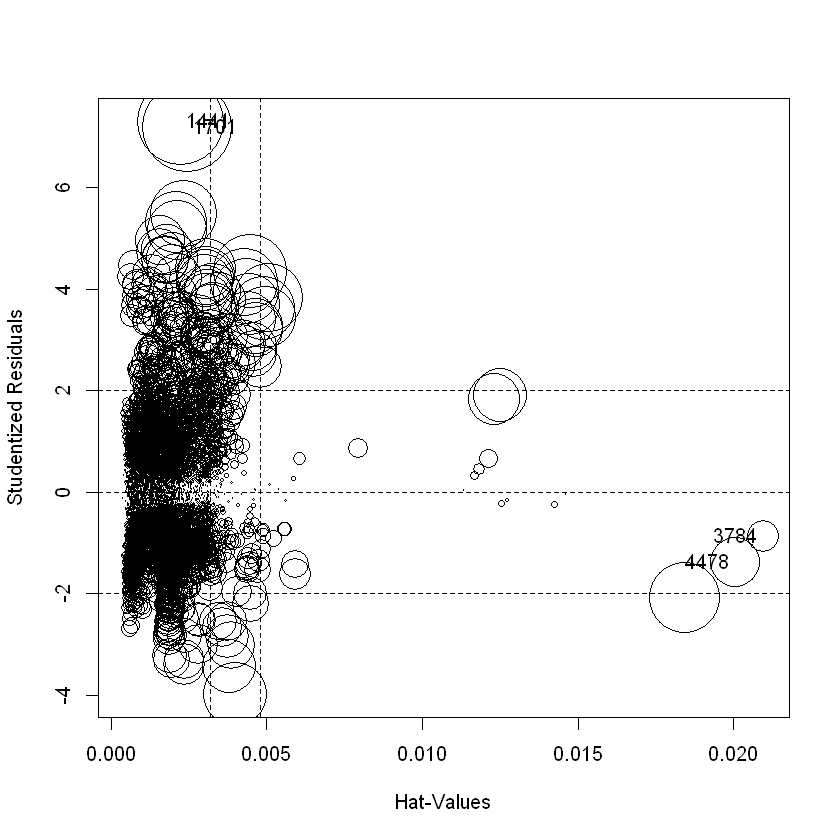

In [69]:
influencePlot(model,identify = 6) # this  variable is needed to be remove as it is highly influsing our model

In [72]:
model1 = lm(price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend,data = df[-1441,]) # created a linear model car 

Warning message in plot.window(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in box(...):
""identify" is not a graphical parameter"
Warning message in title(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""identify" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
20,5.526060,0.002319557,0.007066373
994,4.363540,0.004485016,0.008553461
1701,7.227312,0.002467641,0.012816279
3784,-0.848180,0.020981878,0.001541875
4478,-1.364127,0.020068535,0.003810391


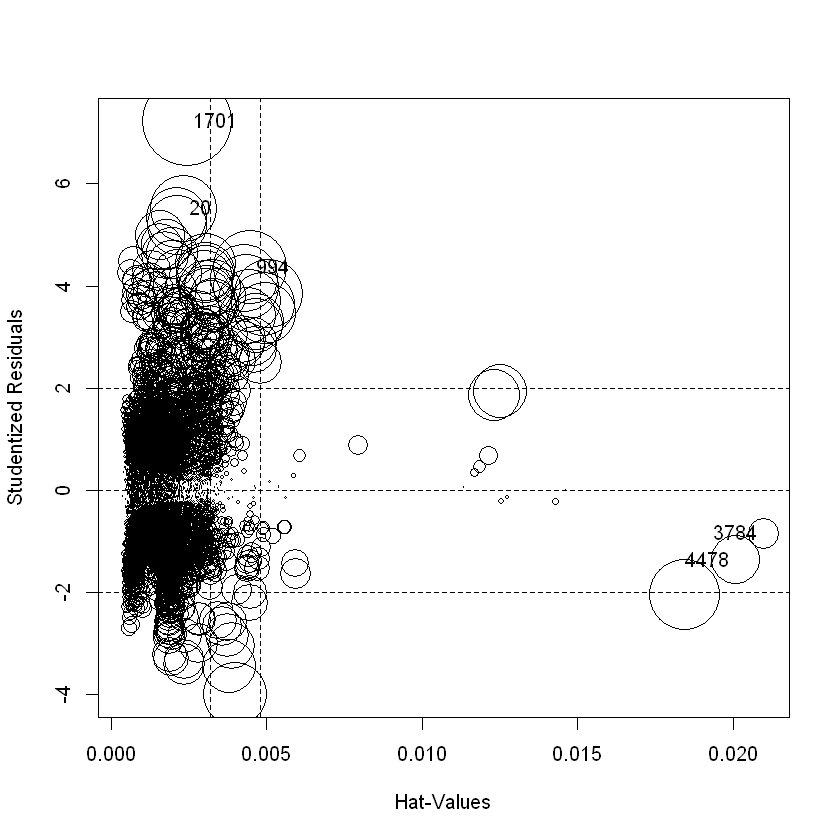

In [73]:
influencePlot(model1,identify = 6) 

In [75]:
print(summary(model1))# litttle change in r^2 value 


Call:
lm(formula = price ~ speed + hd + ram + screen + cd + multi + 
    premium + ads + trend, data = df[-1441, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1094.71  -173.75   -11.35   146.69  1971.24 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  322.9228    60.1368   5.370 8.17e-08 ***
speed          9.3087     0.1843  50.510  < 2e-16 ***
hd             0.7779     0.0275  28.283  < 2e-16 ***
ram           48.3696     1.0618  45.556  < 2e-16 ***
screen       122.0807     3.9852  30.633  < 2e-16 ***
cdyes         61.8324     9.4768   6.525 7.35e-11 ***
multiyes     103.9607    11.3653   9.147  < 2e-16 ***
premiumyes  -509.6809    12.2910 -41.468  < 2e-16 ***
ads            0.6543     0.0511  12.804  < 2e-16 ***
trend        -51.7588     0.6262 -82.654  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 274.2 on 6248 degrees of freedom
Multiple R-squared:  0.7767,	Adjusted R-squa

In [88]:
df1 = df[-1701,] # removed first data point 

In [91]:
df2 = df1[-1441,]# removed second

In [92]:
 model2 = lm(price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend,data = df2) # created a linear model car 

Warning message in plot.window(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in box(...):
""identify" is not a graphical parameter"
Warning message in title(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""identify" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
20,5.5514198,0.002319688,0.007131457
25,5.3617485,0.002100854,0.006025560
994,4.3901973,0.004486461,0.008660764
3784,-0.8312933,0.020989647,0.001481658
4478,-1.3504724,0.020075476,0.003735832
5961,-2.0469486,0.018432280,0.007864135


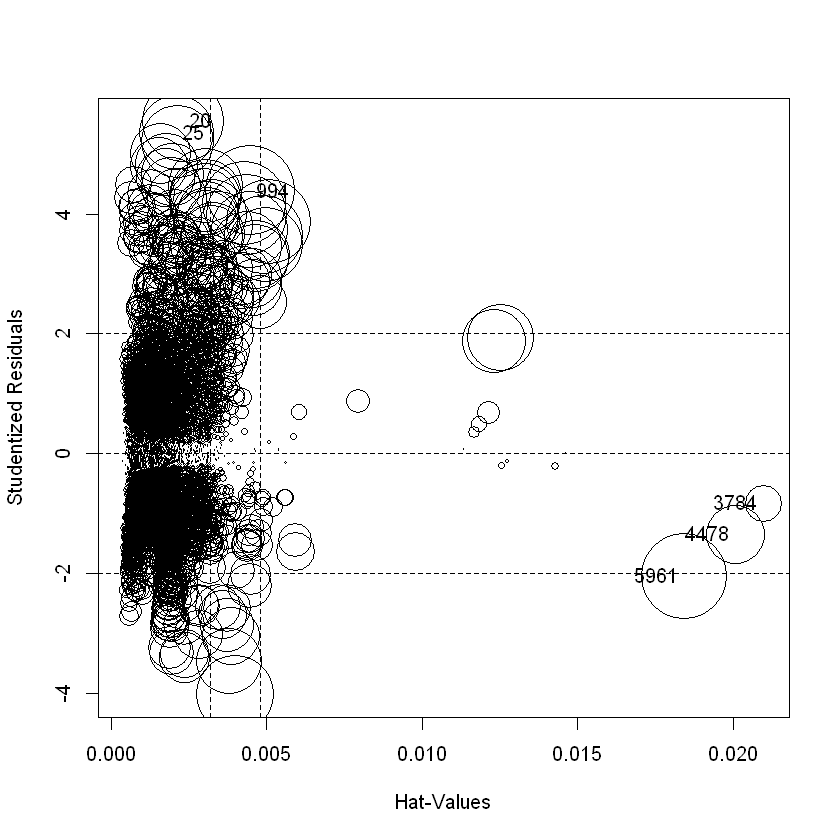

In [93]:
influencePlot(model2,identify = 6) 

In [94]:
print(summary(model2))# r^2 improved but not a significant 


Call:
lm(formula = price ~ speed + hd + ram + screen + cd + multi + 
    premium + ads + trend, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1095.65  -172.78   -10.84   146.42  1510.65 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  337.1635    59.9242   5.627 1.92e-08 ***
speed          9.2992     0.1835  50.664  < 2e-16 ***
hd             0.7749     0.0274  28.286  < 2e-16 ***
ram           48.5222     1.0576  45.878  < 2e-16 ***
screen       121.0926     3.9714  30.492  < 2e-16 ***
cdyes         60.4964     9.4400   6.409 1.58e-10 ***
multiyes     104.7703    11.3195   9.256  < 2e-16 ***
premiumyes  -509.8352    12.2409 -41.650  < 2e-16 ***
ads            0.6510     0.0509  12.791  < 2e-16 ***
trend        -51.6496     0.6238 -82.793  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 273.1 on 6247 degrees of freedom
Multiple R-squared:  0.7777,	Adjusted R-squared:  0.

In [99]:
df3  <-  df2[-5961,]

In [101]:
model3 = lm(price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend,data = df2[-5961,]) # created a linear model car 

Warning message in plot.window(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""identify" is not a graphical parameter"
Warning message in box(...):
""identify" is not a graphical parameter"
Warning message in title(...):
""identify" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""identify" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
20,5.5508791,0.002319859,0.007130596
25,5.3612416,0.002100991,0.006024813
994,4.3892129,0.004488518,0.008660877
3784,-0.8326236,0.020996976,0.001486933
4478,-1.3516693,0.020081747,0.003743648
5961,-2.0476869,0.018435128,0.007871043


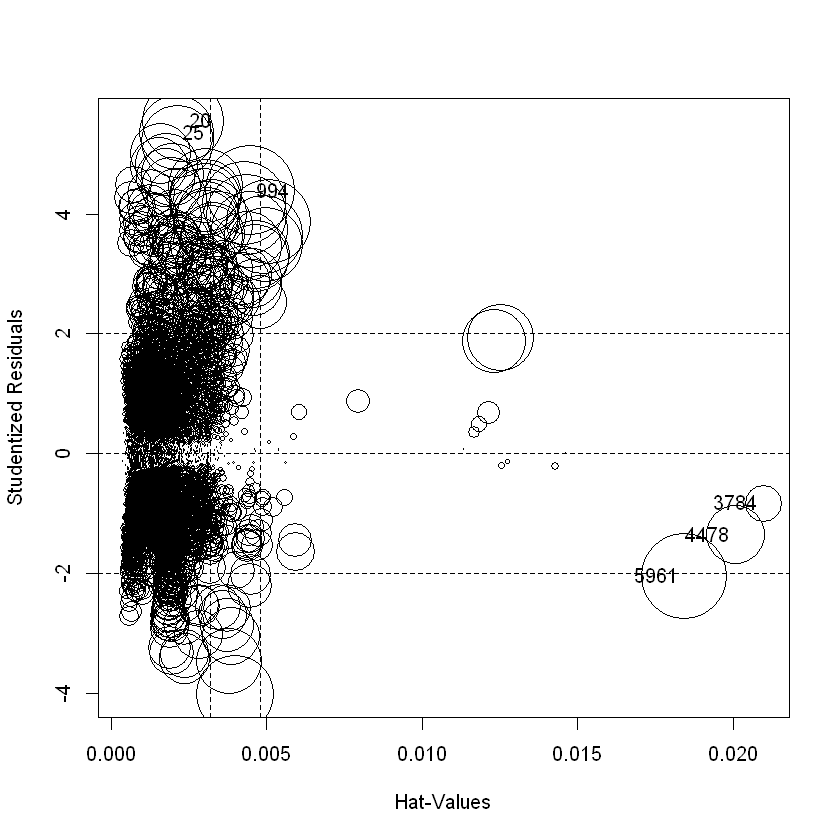

In [102]:
influencePlot(model3,identify = 6) 

In [103]:
print(summary(model3))


Call:
lm(formula = price ~ speed + hd + ram + screen + cd + multi + 
    premium + ads + trend, data = df2[-5961, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1095.39  -172.84   -10.92   146.71  1510.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  336.57947   59.93899   5.615 2.05e-08 ***
speed          9.29959    0.18356  50.663  < 2e-16 ***
hd             0.77513    0.02740  28.288  < 2e-16 ***
ram           48.51285    1.05787  45.859  < 2e-16 ***
screen       121.11631    3.97186  30.494  < 2e-16 ***
cdyes         60.54862    9.44112   6.413 1.53e-10 ***
multiyes     104.77332   11.32018   9.255  < 2e-16 ***
premiumyes  -509.61442   12.24954 -41.603  < 2e-16 ***
ads            0.65143    0.05091  12.797  < 2e-16 ***
trend        -51.65845    0.62413 -82.769  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 273.1 on 6246 degrees of freedom
Multiple R-squared:  0.7777,	Adj

### Split our data into train and test 

In [104]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"


In [105]:
sample_siz = floor(0.70*nrow(df))

In [106]:
sample_siz 

[1] 4381

In [107]:
set.seed(101) # this will give random value each time 
train_random = sample(seq_len(nrow(df)),size = sample_siz) # i have generated random data set
train = df[train_random,] # i have now train and test data 
test = df[-train_random,] # after deduction from test random i got test data also

### Lets make a precition of our data 

In [121]:
price.precict = predict(model3,test)

In [122]:
result  <- cbind(price.precict,test$price) # im storing pridicted value with actual in resutl
colnames(result)  <- c('Predicted','Acutal')# created predicted and actual column 
results  <- as.data.frame(result) # stored values in results a new vector
print(head(results)) # and printing out actual and precicted 

   Predicted Acutal
7   2151.031   1720
10  2475.094   2575
12  2696.822   2605
13  2291.967   2045
21  2133.874   1695
22  2440.760   2795


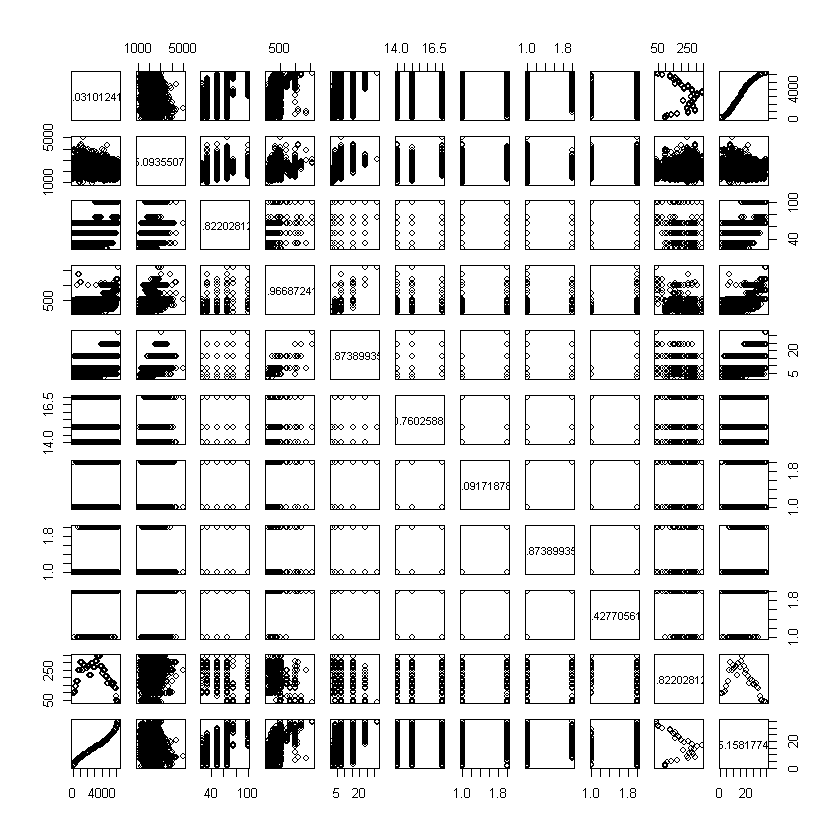

In [124]:
plot(test,price.precict) # plotting the pridicted data 

In [126]:
final_model = model3 # just kept it as final model may be other regression possible 